## Problem Statement: This dataset is used to predict whether a person can suffer from a stroke based on the input parameters like gender, age, maritial status,work type,residence type , different health Issues, and smoking status.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Preprocessing

In [4]:
df.drop(columns=['id'], inplace=True)

In [5]:
#df = df[df['bmi'].notna()]
df['bmi'].fillna(np.round(df['bmi'].mean(), 1), inplace = True)

In [6]:
df['age_binned'] = pd.cut(df['age'], np.arange(0, 91, 5)).cat.codes
df['bmi_binned'] = pd.cut(df['bmi'], np.arange(0, 101, 5)).cat.codes

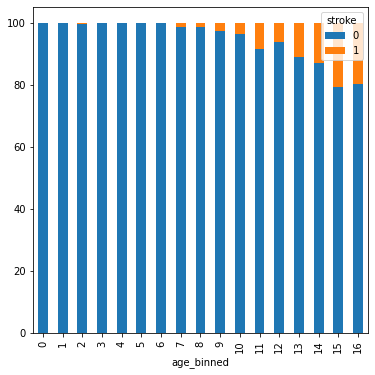

In [7]:
# Get the count of records by age_binned and stroke
df_breakdown = df.groupby(['age_binned', 'stroke'])['age'].count()
# Get the count of records by age_binned
df_total = df.groupby(['age_binned'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

### Observation: Old people are more likely to suffer from a stroke compared to young people patient.

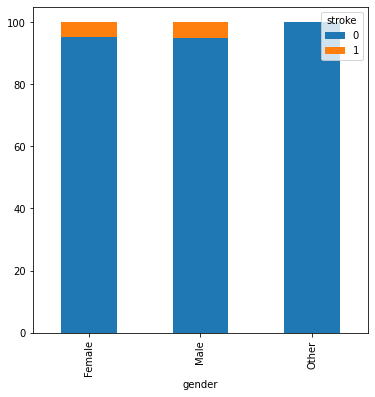

In [8]:
 # Get the count of records by gender and stroke
df_breakdown = df.groupby(['gender', 'stroke'])['age'].count()
# Get the count of records by gender
df_total = df.groupby(['gender'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

### Observation: Gender Does not show much variation, Both Male and Female have equal chances of having stroke.

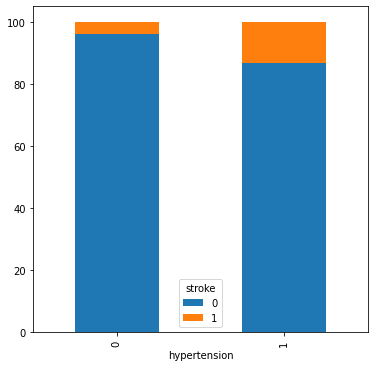

In [9]:
# Get the count of records by hypertension and stroke
df_breakdown = df.groupby(['hypertension', 'stroke'])['age'].count()
# Get the count of records by hypertension
df_total = df.groupby(['hypertension'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

### Observation: People with HyperTension has higher chances of stroke

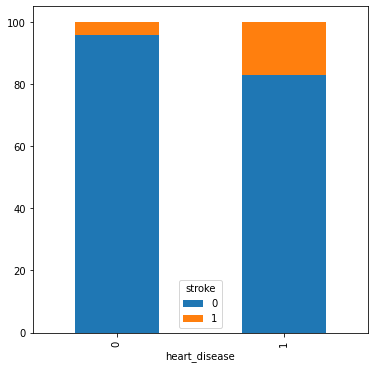

In [10]:
# Get the count of records by heart_disease and stroke
df_breakdown = df.groupby(['heart_disease', 'stroke'])['age'].count()
# Get the count of records by heart_disease
df_total = df.groupby(['heart_disease'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

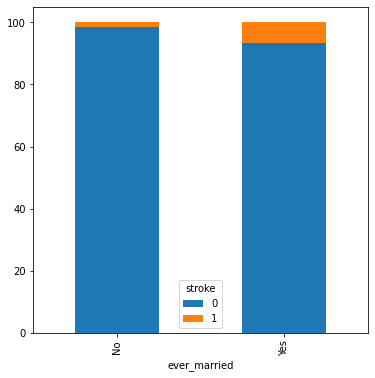

In [11]:
# Get the count of records by ever_married and stroke
df_breakdown = df.groupby(['ever_married', 'stroke'])['age'].count()
# Get the count of records by ever_married
df_total = df.groupby(['ever_married'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

### Observation: From the analysis it can be said married people suffer from stroke more, but again that is a fact that married people are older in age compared to unmarried so we cannot infer anything from it.

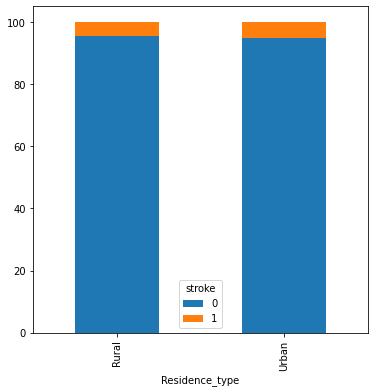

In [12]:
# Get the count of records by Residence_type and stroke
df_breakdown = df.groupby(['Residence_type', 'stroke'])['age'].count()
# Get the count of records by Residence_type
df_total = df.groupby(['Residence_type'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

### Observation: People from Rural areas as well as urban areas both suffer from strokes equally

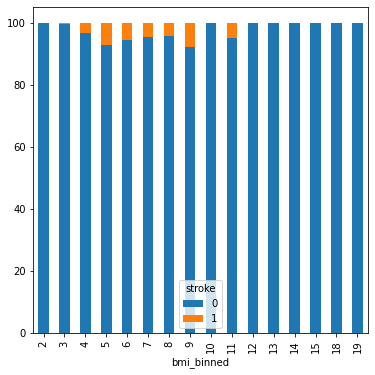

In [13]:
# Get the count of records by bmi_binned and stroke
df_breakdown = df.groupby(['bmi_binned', 'stroke'])['age'].count()
# Get the count of records by bmi_binned
df_total = df.groupby(['bmi_binned'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

### Observation: People with BMI 45-50 suffer more from stroke

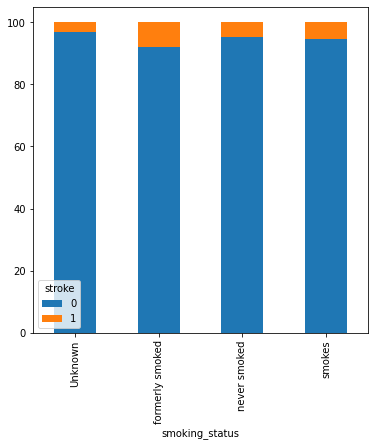

In [14]:
# Get the count of records by smoking_status and stroke
df_breakdown = df.groupby(['smoking_status', 'stroke'])['age'].count()
# Get the count of records by smoking_status
df_total = df.groupby(['smoking_status'])['age'].count()
# Get the percentage for 100% stacked bar chart
df_pct = df_breakdown / df_total * 100
# Create proper DataFrame's format
df_pct = df_pct.unstack()
df_pct.plot.bar(stacked=True, figsize=(6,6));

### Observation: Even the Non Smokers can get a stroke so Smoking does not make any difference in chances of getting a stroke.

### For Better Prediction we will convert the categorial data into numbers

In [15]:
df[['gender']] = df[['gender']].apply(lambda col:pd.Categorical(col).codes)
df[['ever_married']] = df[['ever_married']].apply(lambda col:pd.Categorical(col).codes)
df[['work_type']] = df[['work_type']].apply(lambda col:pd.Categorical(col).codes)
df[['Residence_type']] = df[['Residence_type']].apply(lambda col:pd.Categorical(col).codes)
df[['smoking_status']] = df[['smoking_status']].apply(lambda col:pd.Categorical(col).codes)

### bivariate analysis

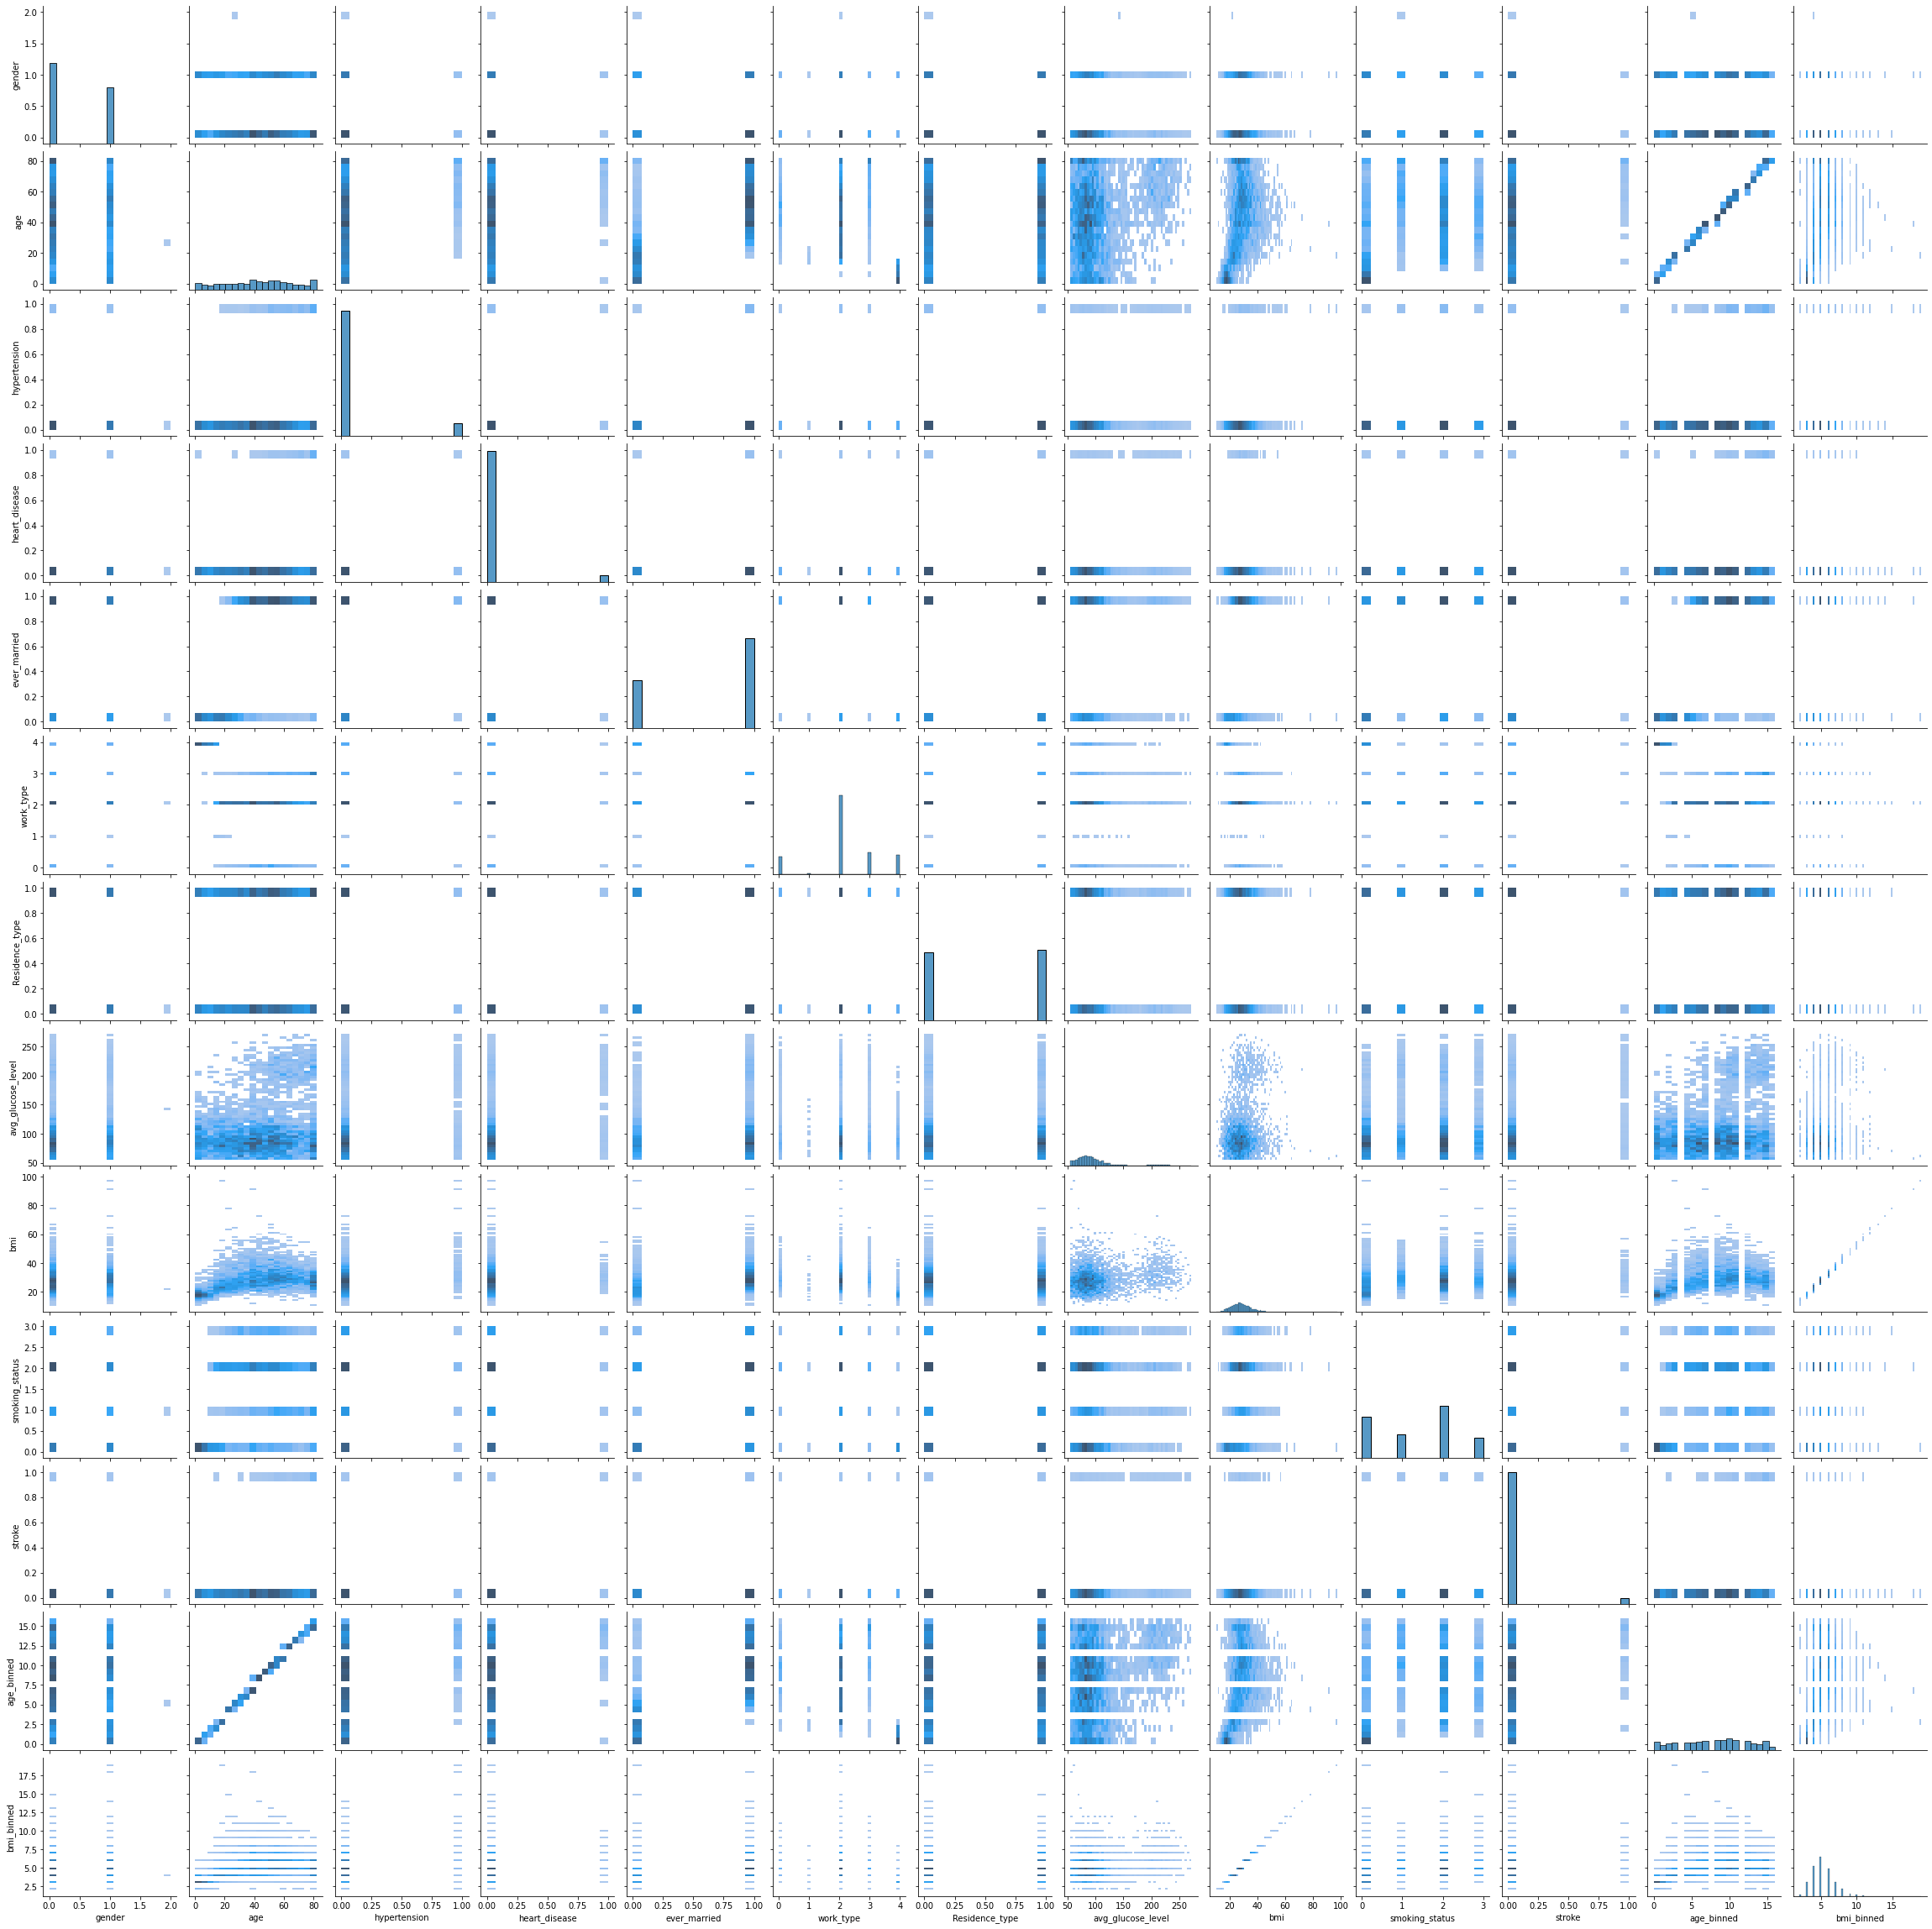

In [173]:

sns.pairplot(df, kind="hist")

As the data set contains mainly binary values and the strength is also week as we can see so it is hard to find corelation using  the pairplot

In the dataset Variable are ordinal; numeric,and categorical.
. Variables are related nonlinearly
. Data is non-normally distributed
so best option to find co relation is Spearman’s Rank Correlation.

<AxesSubplot:>

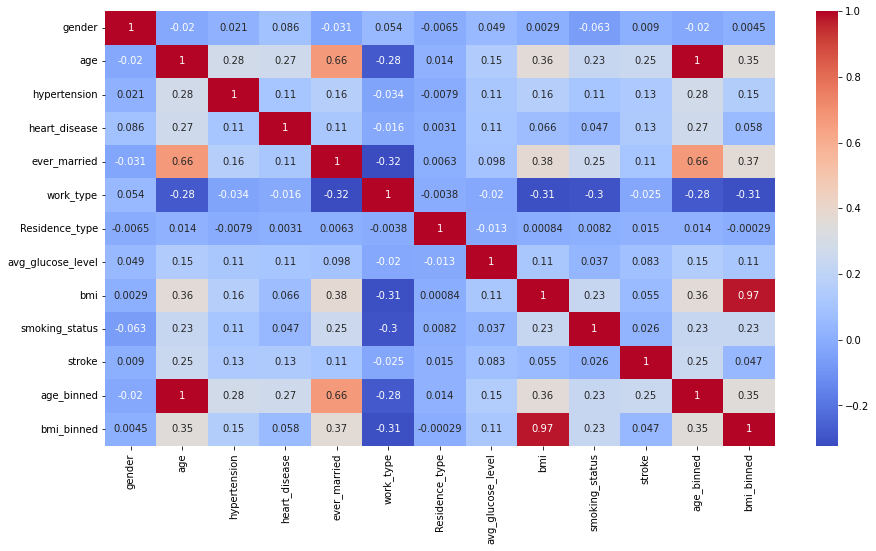

In [16]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(method='spearman'),cmap='coolwarm',annot=True)

### As we can see in the generated heatMap there is not much co relation seen in the data set except between ever_married and age.

In [17]:
X = df.drop('stroke',axis = 1)
y = df['stroke']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
print(X_train.shape,X_test.shape,X.shape)

(4088, 12) (1022, 12) (5110, 12)


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [20]:
poly_model = make_pipeline(PolynomialFeatures(degree=1,include_bias=True),
                           LinearRegression())
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

### In this data set we are most values are binary so Classification model is the best one to be used as Classification algorithms are used to predict/Classify the discrete values and When there are only two classes it is best to use Logistic regression Classification

In [21]:
clf2 = LogisticRegression(random_state=0).fit(X_train, y_train)

In [22]:
clf2.predict(X_test)
clf2.predict_proba(X_test)
y_pred2 = clf2.predict(X_test)

score=clf2.score(X_test, y_test)
print(score)

0.9500978473581213


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.049902152641878667
MSE: 0.049902152641878667
RMSE: 0.2233878972591816


In [24]:
confusion_mat = confusion_matrix(y_test, y_pred2)
print(confusion_mat)

[[971   0]
 [ 51   0]]


In [25]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       971
           1       0.00      0.00      0.00        51

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



Text(0, 0.5, 'Prediction')

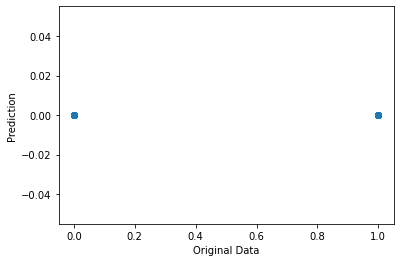

In [26]:
plt.scatter(y_test, y_pred2)
plt.xlabel("Original Data")
plt.ylabel("Prediction")

### HeatMap of Confussion Matrix

<AxesSubplot:>

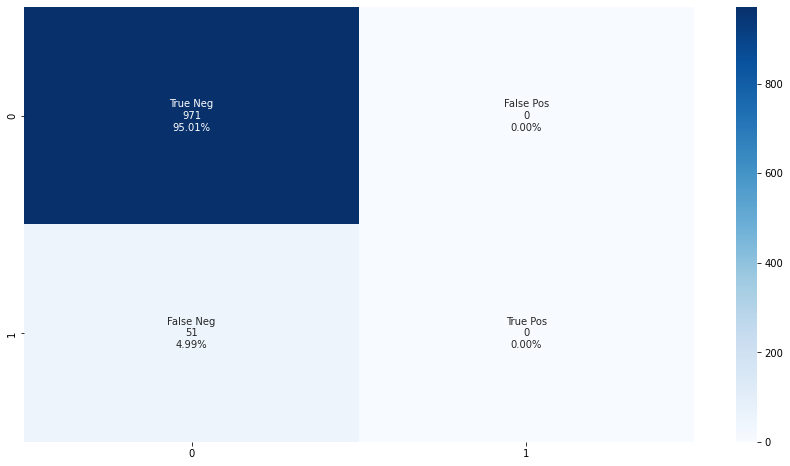

In [27]:
plt.figure(figsize = (15,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_mat.flatten()/np.sum(confusion_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_mat, annot=labels, fmt='', cmap='Blues')